# Project: Movie Time Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing a data set that contains information about 10,000 movies collected from The Movie Database (TMDb), which includes user ratings and revenue. We will look at trends of the most popular movies,  top genres, as well as properties assoicated with movies that have high revenues vs budget cost. We will uses the "tmdb-movies.csv" dataset to collect data of Movies characteristic to underground further investigation of the data at hand. This will help us determine if the higher budgets by genre generate higher revenues. We will analysis statistics around genre, budget and revenue and review how these metrics compare to one another. The implemetation will follow below.

### Questions at Hand:
>
> Which genres are most popular for the last 10 years? 
>What are the Top 10 grossing movies?
>What kinds of properties are associated with movies that have high revenues?


In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Note**: The dataset is pretty clean and there's no need to really clean any of the data elements. We will run through various scenario's to view the data elements.

### General Properties

In [2]:
# Load dataset from CSV
df = pd.read_csv('tmdb-movies.csv')

#### Get the column and row size of the dataset (stats).

In [3]:
df.shape

(10866, 21)

#### Sample of data prior to running analysis (stats).

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Statistics for numerical columns by using the describe() (function / stats).

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### All column data types and missing values using info() prior to dropping any data elements (function / stats).

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Count the number of duplicate records (function).

In [7]:
sum(df.duplicated())

1

#### Drop duplicates (function).

In [8]:
df.drop_duplicates(inplace=True)

#### Check row count after dropping duplicates (function / stats).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

#### User defined function that drops columns not needed as part of the analysis. The remaining columns will be used throughout the analysis as well as in the charts below.

In [10]:
def drop_func():
    df.drop(['imdb_id','cast','homepage','director','tagline','keywords','overview','runtime','production_companies','vote_count'], axis=1, inplace=True)
    df.info()
    return;    

#### Call the drop function above to display the columns used for the analysis.

In [11]:
drop_func();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
genres            10842 non-null object
release_date      10865 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1018.6+ KB


#### Display necessary columns needed for analysis, after dropping other columns (function / stats).

In [12]:
df.head()

,id,popularity,budget,revenue,original_title,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


#### Unique count of movies released by year (aggregate function / stats).

In [13]:
df['release_year'].value_counts().head(10).groupby(level=0, group_keys=False).head(5)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: release_year, dtype: int64

#### Count of unique values of each column, as part of the analysis (function / stats).

In [14]:
df.nunique()

id                10865
popularity        10814
budget              557
revenue            4702
original_title    10571
genres             2039
release_date       5909
vote_average         72
release_year         56
budget_adj         2614
revenue_adj        4840
dtype: int64

#### Seperate numerical and categorical variables for duplication purposes (variables / print function).

In [15]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['id', 'popularity', 'budget', 'revenue', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')
Index(['original_title', 'genres', 'release_date'], dtype='object')


#### All numerical columns with non-null values.

In [16]:
df[num_vars].isnull().sum()

id              0
popularity      0
budget          0
revenue         0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

#### All categories with non-null values. Some movie titles' don't have a genre specified.

In [17]:
df[cat_vars].isnull().sum()

original_title     0
genres            23
release_date       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Note**: Now we will view and explore stats based on budget and revenue of genre and overall movie gross.

### Research Question 1 (What are the Top 10 Grossing Movies?)
> The analysis shows that the high grossing movies really don't need a ton of budget as an investment for the movies, however it does help. Avatar nearly grossed over 3 billion dollars in revenue. Yes, I said 3 billion dollars.

#### List the statistics for the Top 10 Grossing Movies by Revenue (aggregate function / stats).

In [18]:
# Use options function to display revenue with dollars signs (function).
pd.options.display.float_format = '${:,.0f}'.format
df.groupby('original_title')['revenue'].sum().sort_values(ascending=False).head(10).map('${:,.0f}'.format)

original_title
Avatar                                          $2,781,505,847
Star Wars: The Force Awakens                    $2,068,178,225
Titanic                                         $1,845,034,188
The Avengers                                    $1,568,080,742
Jurassic World                                  $1,513,528,810
Furious 7                                       $1,506,249,360
Avengers: Age of Ultron                         $1,405,035,767
Harry Potter and the Deathly Hallows: Part 2    $1,327,817,822
Frozen                                          $1,277,284,869
Iron Man 3                                      $1,215,439,994
Name: revenue, dtype: object

#### List the statistics for the Top 10 Grossing Movies by Revenue (function / bar chart).

Text(0,0.5,'Revenue $M')

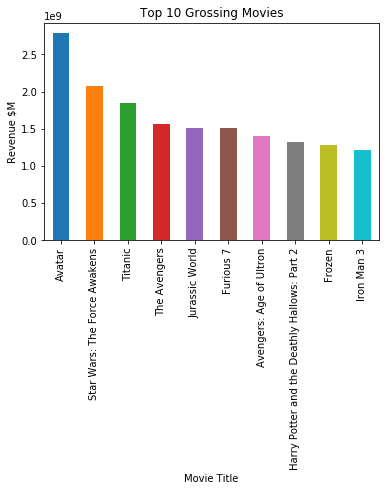

In [19]:
df.groupby('original_title')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
df['budget']>0
plt.title("Top 10 Grossing Movies")
plt.xlabel("Movie Title")
plt.ylabel("Revenue $M")

#### Out of the Top 5 Genres, the Comedy and Drama are included in four of the categories (aggregate function / pie chart).

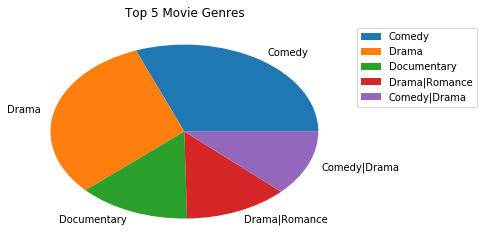

In [20]:
df['genres'].value_counts().head(5).groupby(level=0, group_keys=False).head(5).plot(kind='pie')
plt.title("Top 5 Movie Genres")
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.0, 1.0))

#### List the count of the Top 10 Movie Genres (aggregate function / stats). Drama and Comedy movies were very close to one another in the counts.

In [21]:
df['genres'].value_counts().head(10).groupby(level=0, group_keys=False).head()

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

#### List the count of the Top 10 Movie Genres (aggregate function / bar chart). You can see the differences in the various genre categories, with Comedy and Drama as sub-genres.

Text(0,0.5,'Number of Movies')

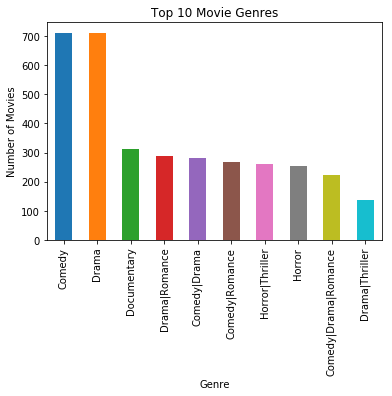

In [22]:
df['genres'].value_counts().head(10).groupby(level=0, group_keys=False).head(5).plot(kind='bar')
plt.title("Top 10 Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")

#### Average voting and counts using histogram.

Text(0.5,1,'Voting Averages')

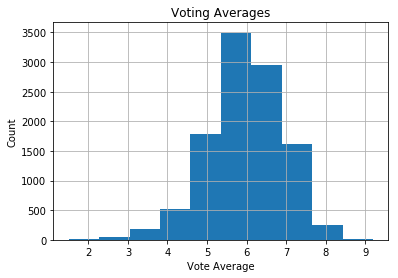

In [23]:
plt = df['vote_average'].hist()
plt.set_ylabel('Count')
plt.set_xlabel('Vote Average')
plt.set_title('Voting Averages')

#### Histogram of columns used in analysis (stats / bar charts). View of each column visual displays in histograms.

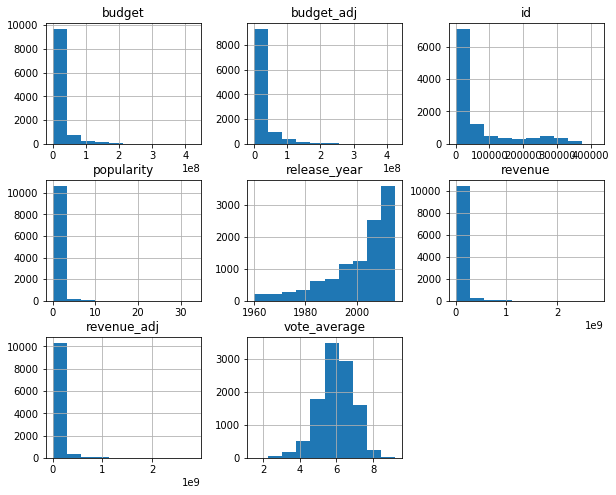

In [24]:
df.hist(figsize=(10,8));

#### Revenue to Budget comparison. Shows the relations between the two metrics. (scatter chart). There's an upward trend in the revenue when the budget is higher.

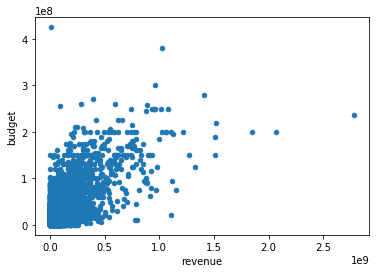

In [25]:
df.plot(x='revenue', y='budget', kind='scatter')

#### Average Budget for Top 10 Genres (stats). Note: Family|Fantasy|Adventure is in both categories at #3 Average = ($200M).

In [26]:
# Use options function to display revenue with dollars signs (function).
pd.options.display.float_format = '${:,.0f}'.format
df.groupby('genres').budget.mean().sort_values(ascending=False).head(10).map('${:,.0f}'.format)

genres
Adventure|Fantasy|Action|Western|Thriller          $425,000,000
Thriller|Action|Adventure|Science Fiction          $209,000,000
Family|Fantasy|Adventure                           $200,000,000
Adventure|Action|Fantasy                           $198,000,000
Action|Family|Science Fiction|Adventure|Mystery    $190,000,000
Animation|Adventure|Comedy|Family|Action           $185,000,000
Fantasy|Adventure|Action|Family|Romance            $180,000,000
Science Fiction|Fantasy|Action|Adventure           $176,000,003
War|Adventure|Drama                                $175,000,000
Adventure|Family|Animation|Action|Comedy           $165,000,000
Name: budget, dtype: object

#### Average Revenue for Top 10 Genres (stats). Note: Family|Fantasy|Adventure is in both categories at #3 Average = ($1B).

In [27]:
# Use options function to display revenue with dollars signs (function).
pd.options.display.float_format = '${:,.0f}'.format
df.groupby('genres').revenue.mean().sort_values(ascending=False).head(10).map('${:,.0f}'.format)

genres
Crime|Drama|Mystery|Thriller|Action                  $1,106,279,658
Action|Adventure|Science Fiction|Fantasy             $1,034,089,112
Family|Fantasy|Adventure                             $1,025,467,110
Adventure|Fantasy|Family|Mystery                       $938,212,738
Science Fiction|Thriller|Action|Adventure              $847,423,452
Action|Thriller|Science Fiction|Mystery|Adventure      $825,500,000
Science Fiction|Adventure|Family|Fantasy               $792,910,554
Family|Animation|Drama                                 $788,241,776
Fantasy|Adventure|Action|Family|Romance                $758,410,378
Comedy|Adventure|Fantasy|Animation|Family              $752,600,867
Name: revenue, dtype: object

### Research Question 2 (Do higher budget's by genre generate higher revenue's?)
> **Findings**: After looking at the analysis, only 20% of the budget by genre represents the top 10 of revenue by genre. The Family/Fantasy/Adventure and the Fantasy/Adventure/Action/Family/Romance genres are part of the top 10 budget and revenues collectively. This is very interesting to see this low metric. I thought the metric would have at least been 50%.

### Conclusions Phase (Analyzing the Findings)
> **Note:** There was only one sample of data used for the analysis which included all the relative data elements. The statistical testing could have probably used a more efficent method of categorizing the sub-genres to get a more accurate correlation, as it relates to budget and revenue averages. By doing so, this could have improved the overall results, and taking the limits off of this category. It would be interesting to see if the results of the generated dollar amounts and top genres would have had an significant variation. Maybe by splitting out the sub-genres other categories, such as Action and Thriller would have increased in the ratings. 

<a id='conclusions'></a>
## Conclusions

> **Note:** In conclusion, the comparison between the budget and revenue was a good representation for the analysis. The data provided was sufficient for the statistical testing. I don't think that the missing values dictated the outcome of the analysis in a negative way. The data set was pretty clean, so this made the wrangling process smooth. The comparisons of different categories like genre provided a fair amount of data elements that were grouped to provide proper statistical test. I also found out that the data in the analysis proofed to be true in some scenario's and false in others. For one you don't have to spend a lot of money on your budget, to have a well-liked movie. However, if you are concerned with revenue, you better invest wisely into your production. Higher budget's by genre can ultimately generate higher revenues. The statistics proof to provide value after analyzing and digging into the data. This analysis was very interesting and very engaging to see how the data represented visually and statistically.
